In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaries/salaries.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/salaries/salaries.csv")

df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
df.shape

(16, 4)

In [5]:
df.dtypes

company                  object
job                      object
degree                   object
salary_more_then_100k     int64
dtype: object

## DATA PROCESSING

In [8]:
X = df.drop(columns = ['salary_more_then_100k']) # this has categorical columns
y = df['salary_more_then_100k']

X.shape, y.shape

((16, 3), (16,))

In [9]:
X.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['le_company'] = le.fit_transform(X.company)
X.le_company.sample(6)

9     0
0     2
14    1
3     2
13    1
10    1
Name: le_company, dtype: int64

In [13]:
X['le_job'] = le.fit_transform(X.job)
X.le_job.sample(6)

1     2
4     1
0     2
13    0
5     1
7     1
Name: le_job, dtype: int64

In [14]:
X['le_degree'] = le.fit_transform(X.degree)
X.le_degree.sample(6)

14    0
12    0
6     1
2     0
10    0
3     1
Name: le_degree, dtype: int64

In [15]:
X.head()

,company,job,degree,le_company,le_job,le_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [ ]:
X = X.drop(columns = ['company','job','degree'])


In [19]:
X.head() # Completely encoded columns

,le_company,le_job,le_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [20]:
X.dtypes

le_company    int64
le_job        int64
le_degree     int64
dtype: object

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
model.score(X_test, y_test)

0.75

In [27]:
y_pred = model.predict(X_test)

<Axes: >

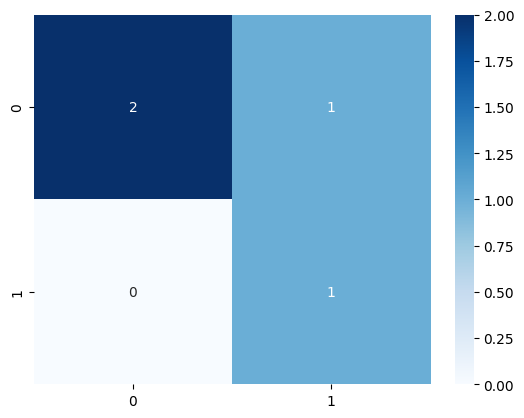

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, cmap = 'Blues', annot = True)